In [8]:
import numpy as np
import pandas as pd
from scipy.special import erf
from scipy.stats import norm
from scipy.stats import ncx2
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import lognorm
from scipy import special
from pytictoc import TicToc

In [9]:
#Standard normal random numbers with the
#Box-Muller algorithm and its Marsaglia variant

#Define the parameters
a = -4 #left truncation
b = 4 #right truncation
ngrid = 200 #number of grid steps
nsample = 2000 #number of random samples

#Define the grid using the colon operator
deltax = (b-a)/ngrid #grid step
x = np.arange(a,b+deltax,deltax) #grid

Elapsed time is 0.001818 seconds.


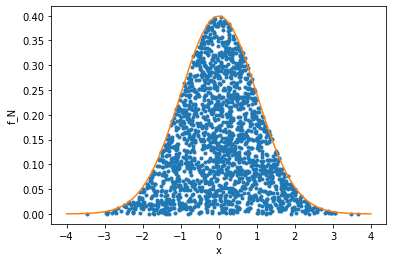

In [10]:
#Box-Muller
U1=np.random.rand(int(nsample/2))
U2=np.random.rand(int(nsample/2))
timing=TicToc()
timing.tic()
rho=np.sqrt(-2*np.log(U1))
theta=2*np.pi*U2
N=list(rho*np.cos(theta))+list(rho*np.sin(theta)) #standard normal numbers
timing.toc()

#Scatter plot
U=np.random.rand(nsample)
plt.figure(1)
plt.plot(N,U*norm.pdf(N,0,1),'.',x,norm.pdf(x,0,1))
plt.xlabel('x')
plt.ylabel('f_N')
plt.show()

Elapsed time is 0.003853 seconds.


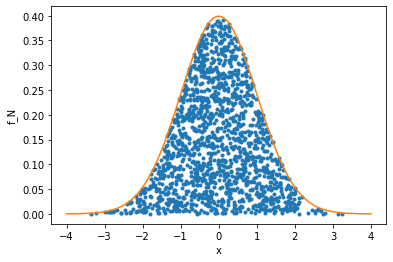

In [11]:
#Variant of Marsaglia
timing.tic()
V1=2*U1-1
V2=2*U2-1
W=V1**2+V2**2
I=W<=1
WI=W[I]
rho2=np.sqrt(-2*np.log(WI)/WI)
N1=list(rho2*V1[I])+list(rho2*V2[I]) #standard normal numbers
timing.toc()
L=len(N1)

#Scatter plot
plt.figure(2)
plt.plot(N1,U[:L]*norm.pdf(N1,0,1),'.',x,norm.pdf(x,0,1))
plt.xlabel('x')
plt.ylabel('f_N')
plt.show()